## 1. Problem Statement

Concrete is the most important material in civil engineering. The 
concrete compressive strength is a `highly nonlinear` function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate. Prediction of `Compressive Strength` by `Regression Analysis` by using `Least Square Method` and `Gradient Descent Algorithm`

## 2. Data Collection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:/Users/shuve/Desktop/ML Lab/Assignment-1/Concrete_Data.xlsx")

## 3. Exploring Data

In [3]:
df.shape

(1030, 9)

In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
df.memory_usage()

Index                                                     132
Cement (component 1)(kg in a m^3 mixture)                8240
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    8240
Fly Ash (component 3)(kg in a m^3 mixture)               8240
Water  (component 4)(kg in a m^3 mixture)                8240
Superplasticizer (component 5)(kg in a m^3 mixture)      8240
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     8240
Fine Aggregate (component 7)(kg in a m^3 mixture)        8240
Age (day)                                                8240
Concrete compressive strength(MPa, megapascals)          8240
dtype: int64

In [7]:
df.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


Changing the column names.

In [8]:
df.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','y']

In [9]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


### Univariate Analysis

In [10]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


#### Distribution of Features 

Axes(0.125,0.11;0.775x0.77)Axes(0.125,0.11;0.775x0.77)Axes(0.125,0.11;0.775x0.77)Axes(0.125,0.11;0.775x0.77)Axes(0.125,0.11;0.775x0.77)Axes(0.125,0.11;0.775x0.77)Axes(0.125,0.11;0.775x0.77)Axes(0.125,0.11;0.775x0.77)

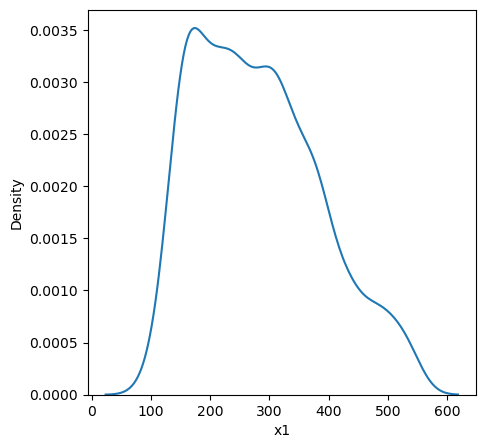

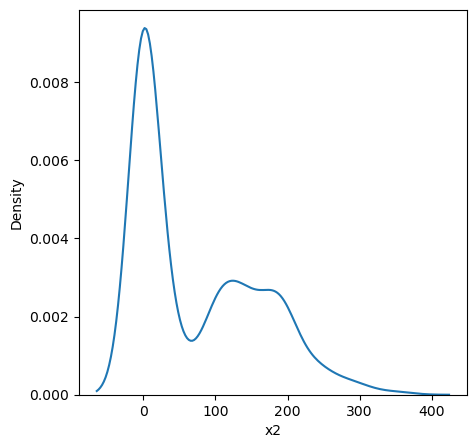

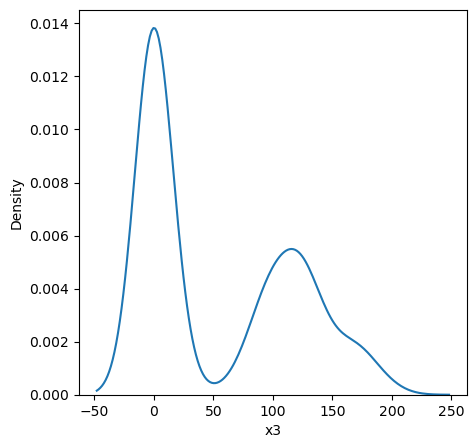

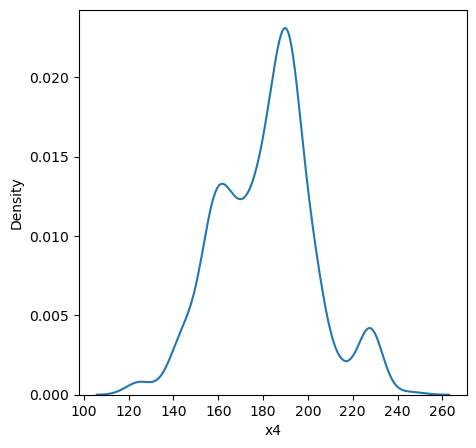

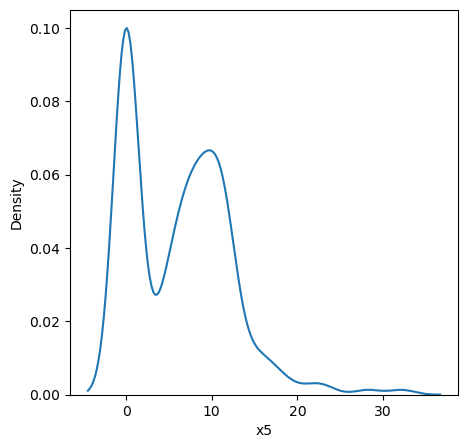

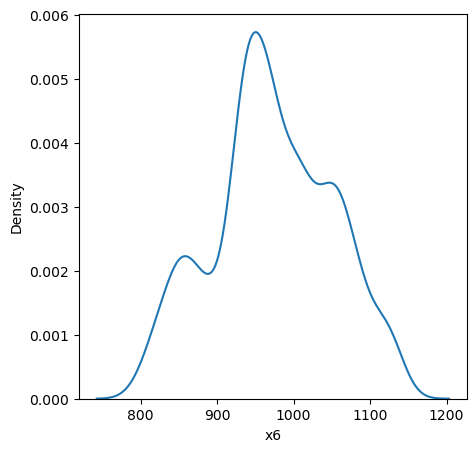

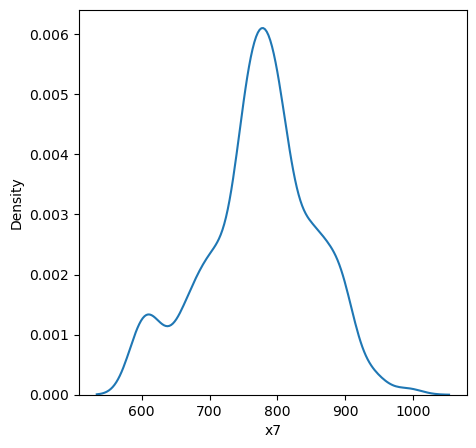

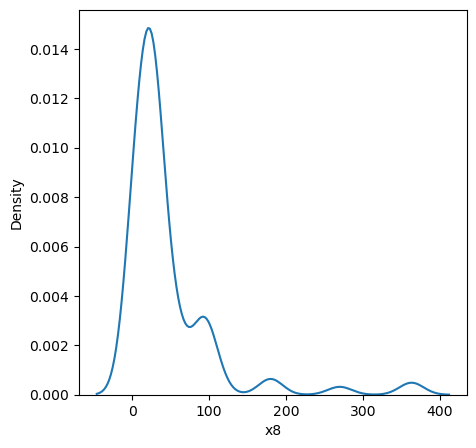

In [11]:
for i in range(0,8):
    plt.figure(figsize = (5,5))
    print(sns.kdeplot(df.iloc[:,i]), end = '')
plt.show()


### Correlation between Target and Features

#### Scatter Plot between Target Vs Features

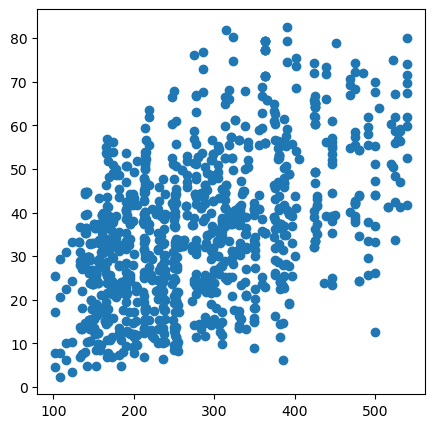

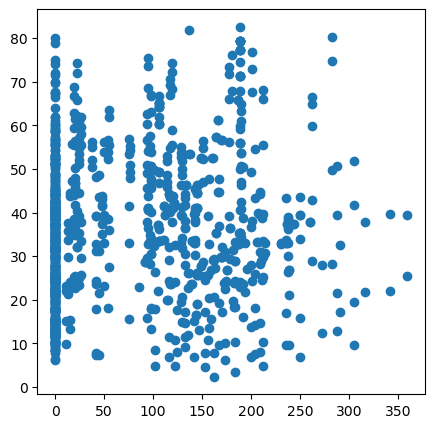

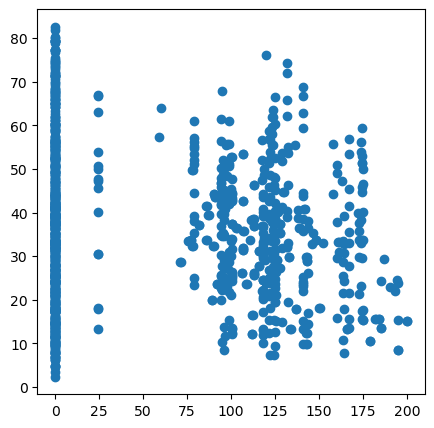

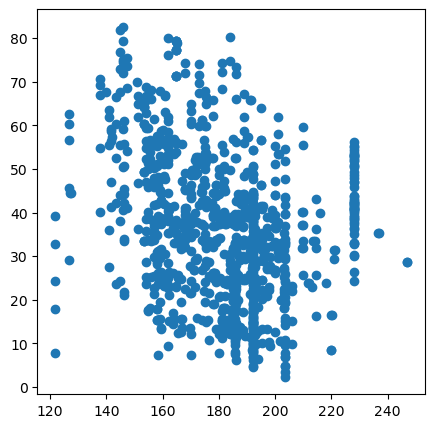

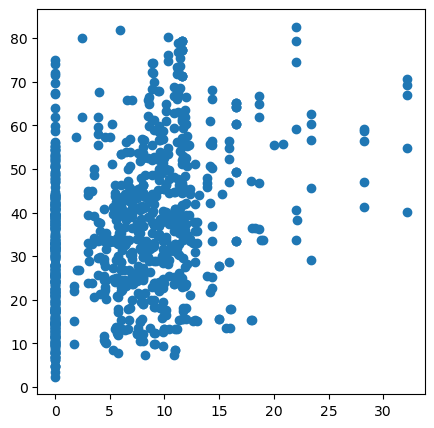

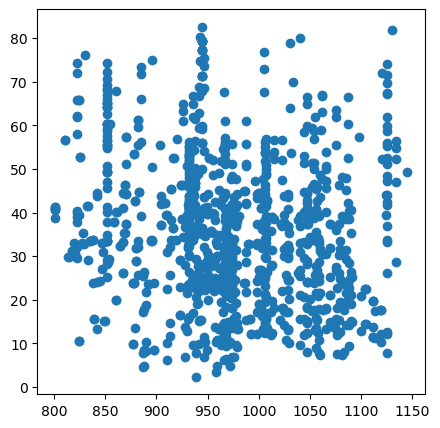

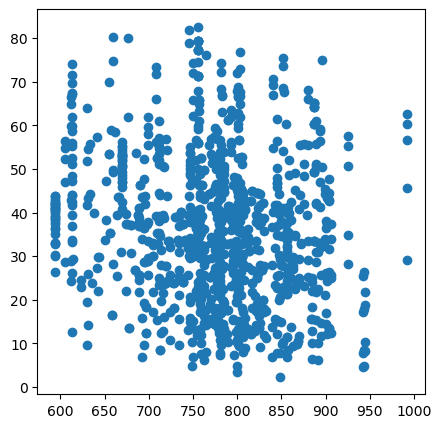

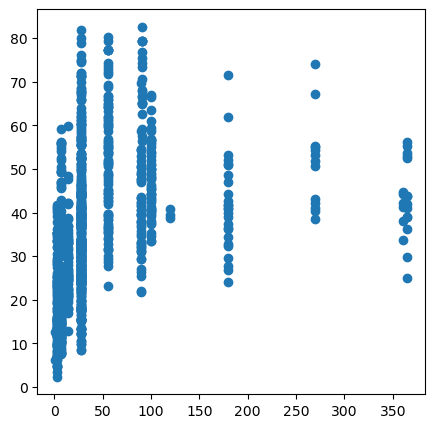

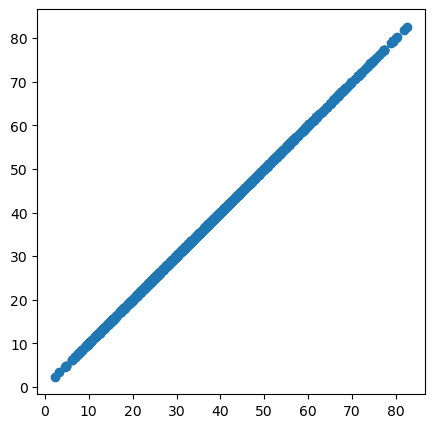

In [12]:
for i in df.columns:
    plt.figure(figsize=(5,5))
    print(plt.scatter(df[i],df['y'],label = i),end="")
    plt.show()

In [13]:
for i in df.columns:
    print(i,pd.DataFrame(np.corrcoef(df[i],df['y']))[0][1])

x1 0.4978327222748441
x2 0.13482444514334266
x3 -0.10575334763608231
x4 -0.28961347569041523
x5 0.3661022976832246
x6 -0.16492782105733456
x7 -0.16724896198168887
x8 0.3288769755102842
y 1.0


We can Observe that all the correlation coefficients between target and features are less than `0.5`.So, fetures have very less direct correlation on target.

### Bi-Variate and Multi Variate Analysis 

#### Multi Colinearity between Features

In [14]:
df.iloc[:,0:8].corr()

,x1,x2,x3,x4,x5,x6,x7,x8
x1,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947
x2,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246
x3,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370
x4,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604
x5,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717
x6,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016
x7,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094
x8,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000


From this above Correlation Matrix, we can observe that multi colinearity does not exist as all correlation coefficients are tends to `0`

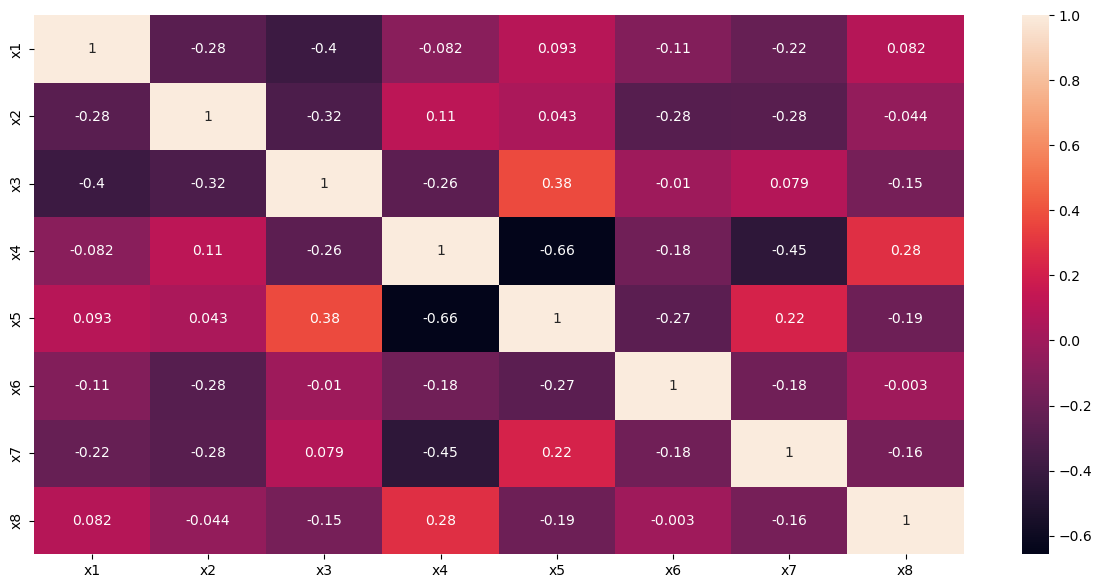

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(df.iloc[:,0:8].corr(),annot = True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


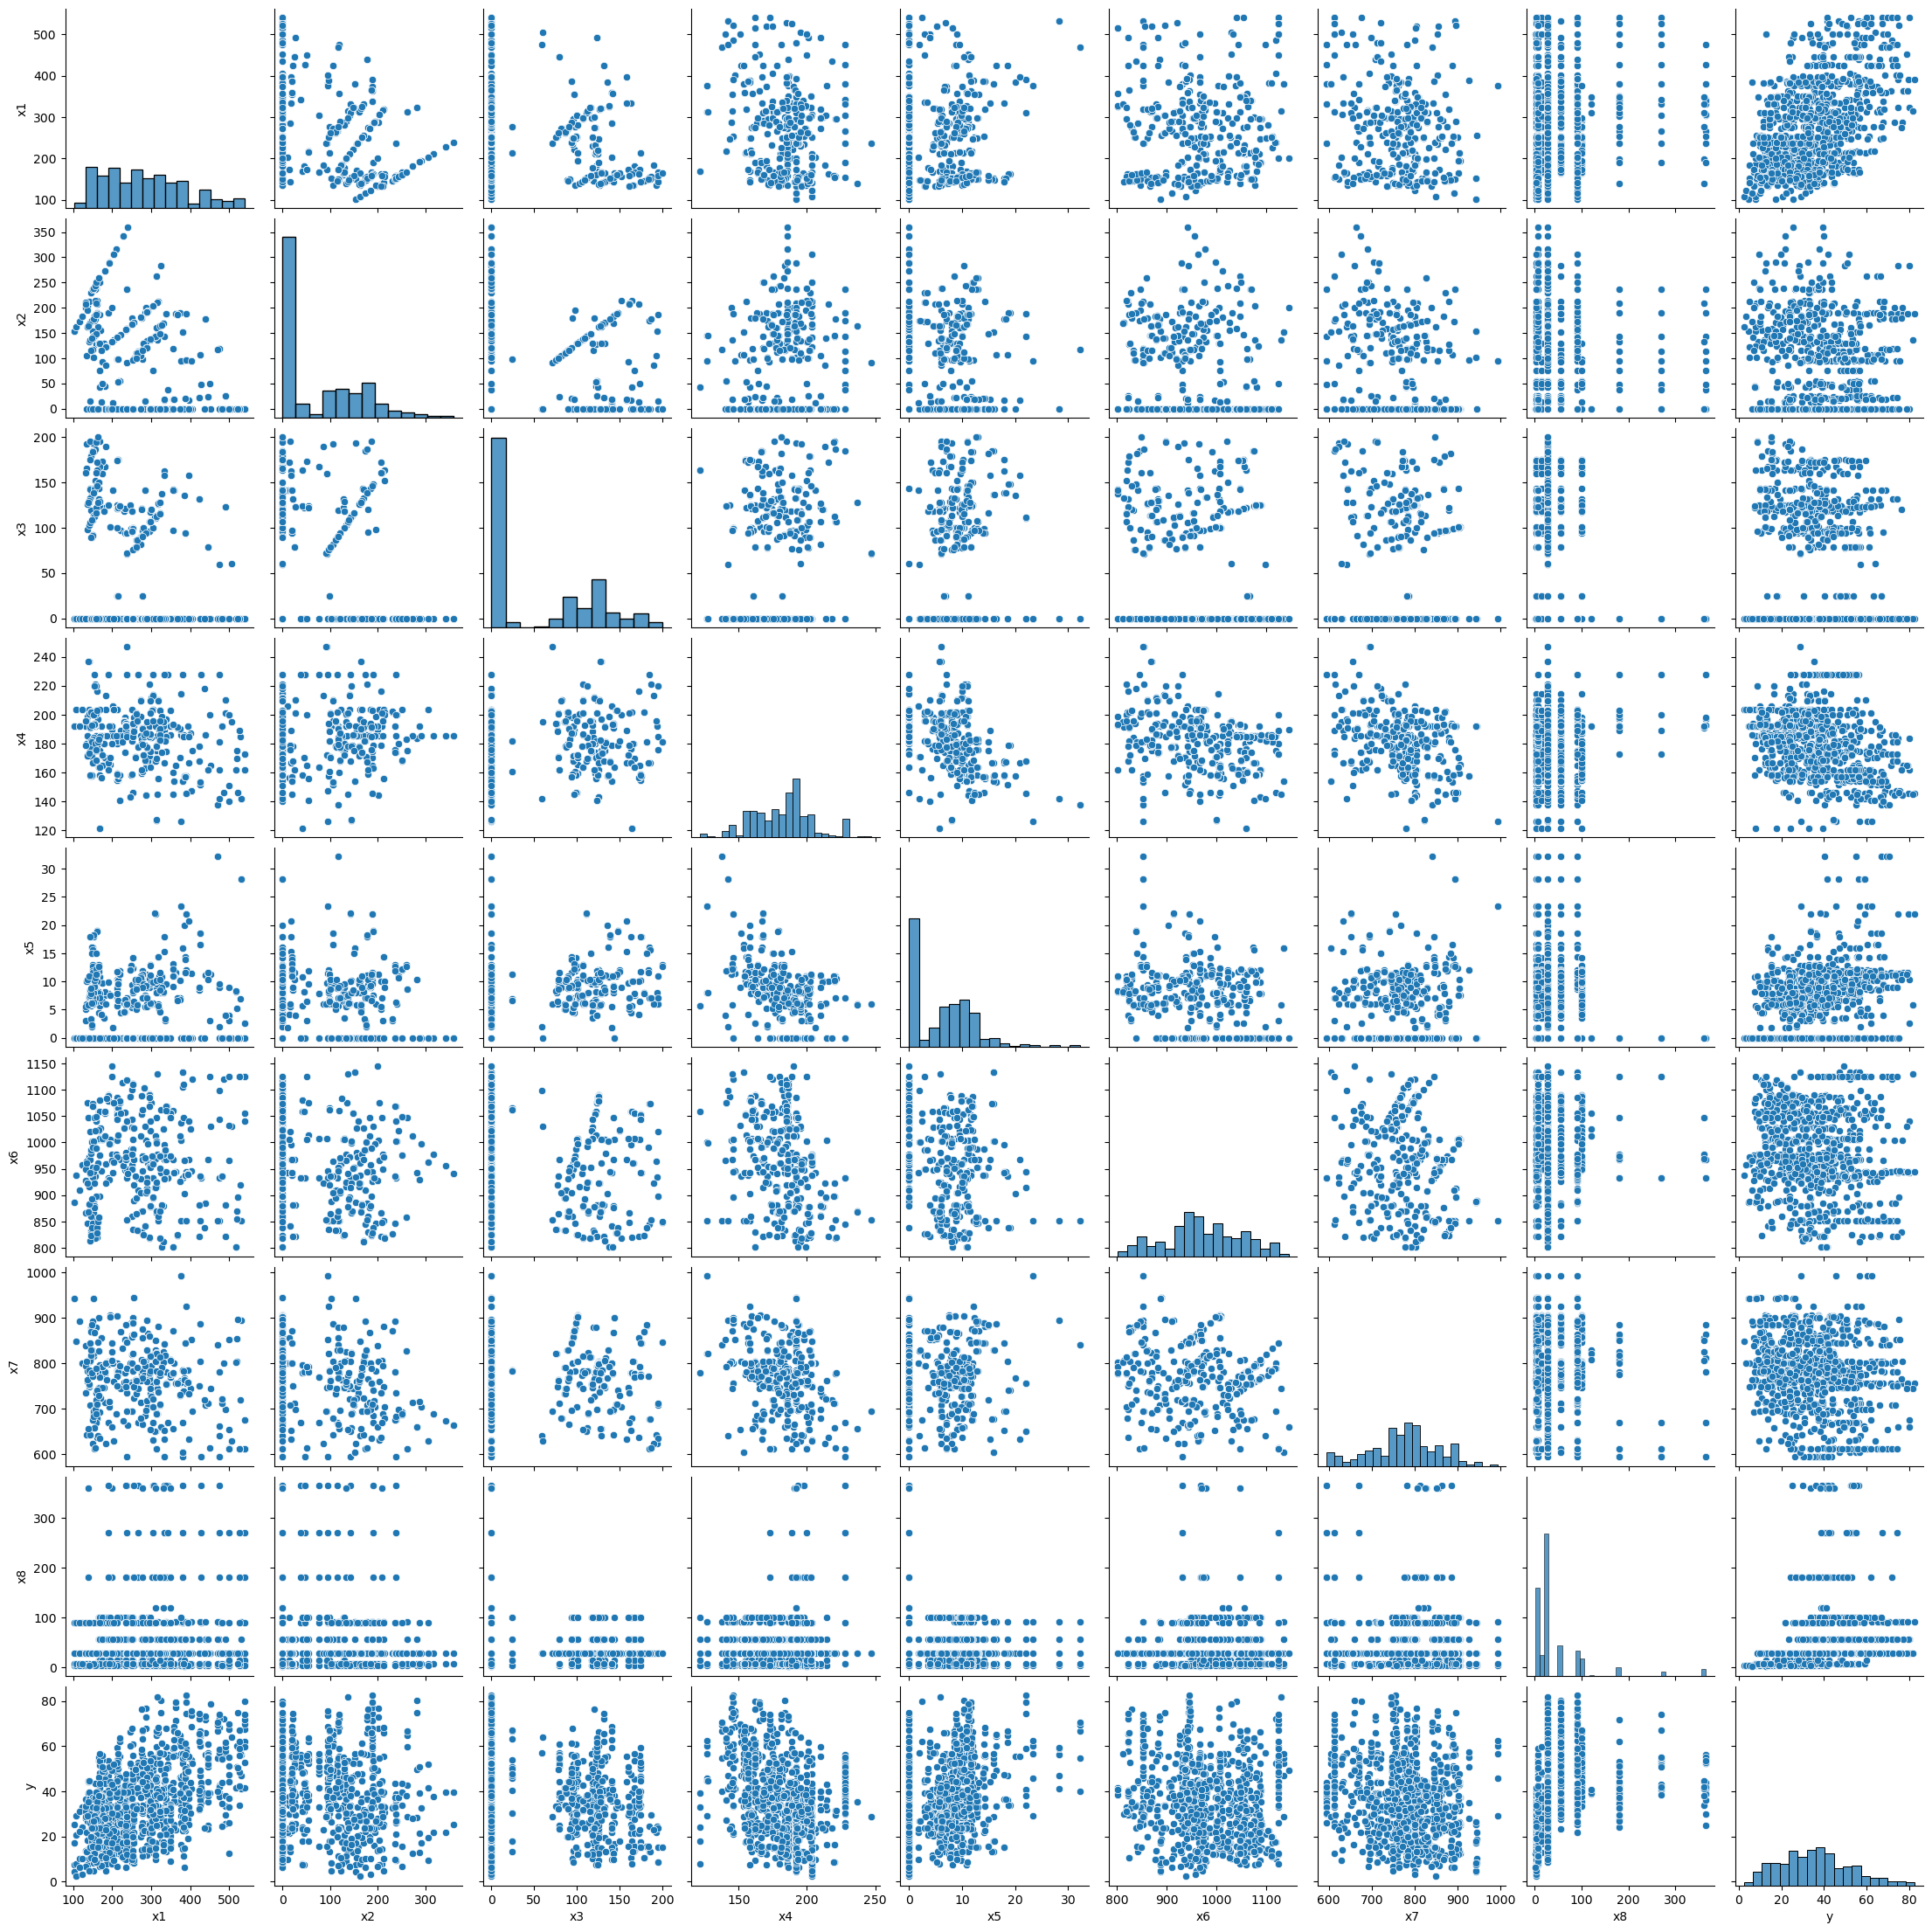

In [16]:
sns.pairplot(df)

## 5.Data Cleaning and Transformation

#### Null Value Check

In [17]:
df.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
y     0
dtype: int64

We can observe no null value is present in data set.

#### Standardization of data Features

In [18]:
df_s = df.iloc[:,0:8]
df_s = (df_s - df_s.mean())/df_s.std()

In [19]:
df_s.describe()

,x1,x2,x3,x4,x5,x6,x7,x8
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,9.657862e-17,-9.657862e-17,-6.898473e-17,3.311267e-16,-8.278168e-17,2.345481e-16,-1.793603e-16,7.588320e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.714386e+00,-8.564702e-01,-8.467207e-01,-2.800973e+00,-1.038440e+00,-2.211063e+00,-2.239824e+00,-7.070160e-01
25%,-8.496130e-01,-8.564702e-01,-8.467207e-01,-7.804222e-01,-1.038440e+00,-5.262583e-01,-5.316951e-01,-6.120340e-01
50%,-7.909154e-02,-6.014838e-01,-8.467207e-01,1.607843e-01,2.459003e-02,-6.325853e-02,7.397674e-02,-2.795973e-01
75%,6.586571e-01,8.003620e-01,1.001350e+00,4.885677e-01,6.624079e-01,7.264133e-01,6.288849e-01,1.636517e-01
max,2.476715e+00,3.309081e+00,2.280014e+00,3.064009e+00,4.352042e+00,2.213157e+00,2.731774e+00,5.055221e+00


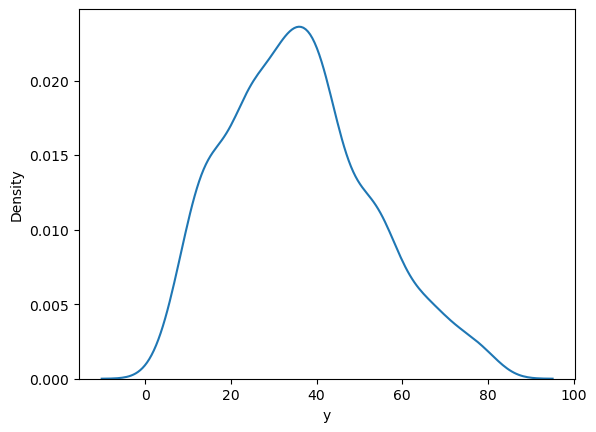

In [20]:
sns.kdeplot(df['y'])
plt.show()

#### Outlier dection and Treatment

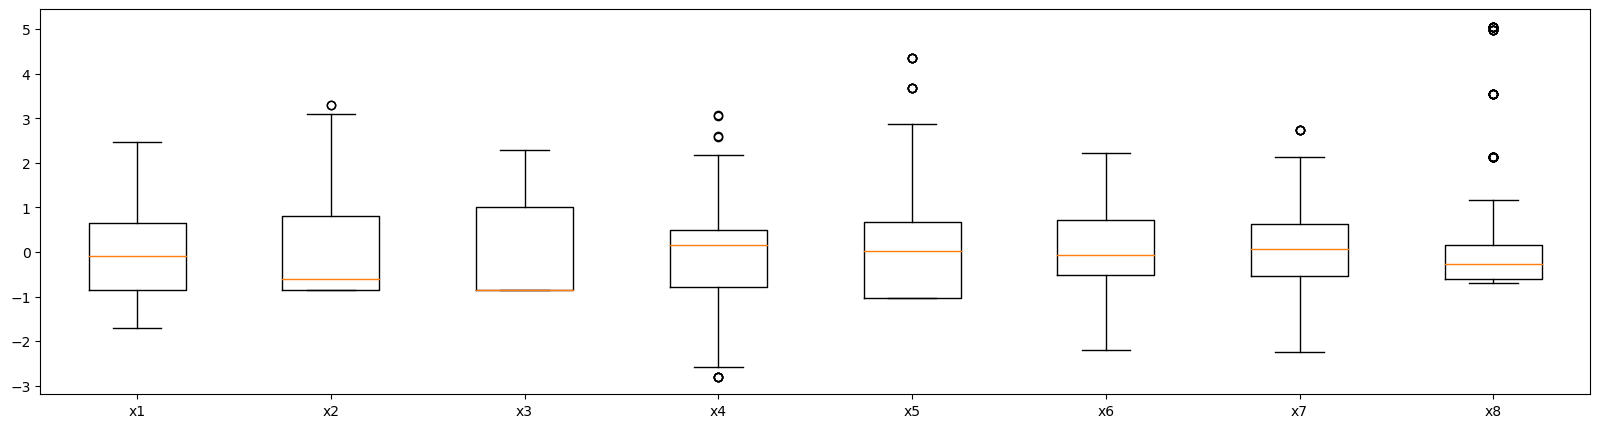

In [21]:
plt.figure(figsize = (20,5))
plt.boxplot(df_s,labels = df_s.columns)
plt.show()

From the box plots we can observe there are some outliers.We should the outliers as least squares pulls the fitted equation toward the outlier as it minimizes the residual sum of squares. But before doing it we need to check the significance of non-statistical evidence behind this.

We can see more bad values are in present in x8(Age(Days).So, we need to check `x8` first

#### Z-Score Test 

In [22]:
print(df['x8'].unique())
a=[]
for i in df['x8']:
    if (int(i) - df['x8'].mean())/df['x8'].std() > 3:
        a.append(i)
pd.Series(a).unique()

[ 28 270 365 360  90 180   3   7  56  91  14 100 120   1]


array([270, 365, 360], dtype=int64)

We can observe the the '3' outliers are coming because of days = '365','360','270'.But we can't remove these, bcz no non-statistical evidence is present.  

We can see more bad values are in present in x5(Superplasticizer).So, we need to check x5 in second step.

#### Instead of going for one by one feature for Outliers, it is better to go for `Cook's and Mahalonobi's Distance` approach

#### Cook's Distance & Mahalonobi's Distance

In [23]:
x = df.iloc[:,0:8]
l = x -x.mean()
r = l.T
m = np.cov(x)
print(l.shape,m.shape,r.shape)
import math

(1030, 8) (1030, 1030) (8, 1030)


In [24]:
df_s.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8
0,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,0.862741,-1.217067,-0.279597
1,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,1.055658,-1.217067,-0.279597
2,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,3.551340
3,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,5.055221
4,-0.790048,0.678084,-0.846721,0.488568,-1.038440,0.070497,0.647594,4.976069
5,-0.145116,0.464823,-0.846721,2.174311,-1.038440,-0.526258,-1.291903,0.701883
6,0.945719,0.244607,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,5.055221
7,0.945719,0.244607,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,-0.279597
8,-0.145116,0.464823,-0.846721,2.174311,-1.038440,-0.526258,-1.291903,-0.279597
9,1.854748,-0.856470,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,-0.279597


We can observe that, we should not remove the outliers as there is no non-statistical evidence for revoming it.

#### Independent and Dependent Feature

In [25]:
df_s.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8
0,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,0.862741,-1.217067,-0.279597
1,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,1.055658,-1.217067,-0.279597
2,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,3.551340


In [26]:
x = df_s.iloc[:,:8]
x.head(n=3)

,x1,x2,x3,x4,x5,x6,x7,x8
0,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,0.862741,-1.217067,-0.279597
1,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,1.055658,-1.217067,-0.279597
2,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,3.551340


In [27]:
y = df['y']
y.head(3)

0    79.986111
1    61.887366
2    40.269535
Name: y, dtype: float64

### Training and Testing Data 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8
483,1.577255,-0.578303,0.387722,-0.916218,0.910169,-0.076120,-0.768052,0.163652
355,-0.038042,0.277292,-0.464512,-0.977092,0.834836,1.141827,0.110771,-0.501222
443,-0.827557,-0.856470,0.723991,-0.533648,0.213759,0.322575,1.599257,-0.279597


We have devided the data set into `2` part (Train vs Test) with `4:1` ratio.

In [30]:
x_train.shape

(824, 8)

In [31]:
y_train.head(3)

483    55.254607
355    47.711739
443    37.266178
Name: y, dtype: float64

In [32]:
y_train.shape

(824,)

In [33]:
x_test.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8
214,-0.869085,-0.856470,1.109325,-0.923242,0.615534,1.481360,0.361845,-0.675355
906,-0.145116,0.441642,0.512729,-0.166999,0.635623,-0.809203,-0.356454,-0.279597
704,-0.296302,1.076790,-0.846721,1.027069,-1.038440,0.060208,-0.991312,-0.675355


In [34]:
x_test.shape

(206, 8)

In [35]:
y_test.head(3)

214     9.445821
906    39.417343
704     9.731264
Name: y, dtype: float64

In [36]:
y_test.shape

(206,)

## 6. Model Training

## Linear Regression Model Using Gradient Descent

In [37]:
from sklearn.linear_model import SGDRegressor as sr
regr = sr(max_iter = 10000)
regr.fit(x_train, y_train)
pd.Series(regr.coef_)

0    11.484331
1     7.653565
2     4.755183
3    -4.378245
4     1.546878
5     0.143526
6     0.202415
7     7.482778
dtype: float64

In [38]:
pd.DataFrame({'y_pred':regr.predict(x_test),'y_act':y_test})

,y_pred,y_act
214,25.291784,9.445821
906,39.911638,39.417343
704,25.789498,9.731264
103,54.884601,49.201007
816,44.704937,42.423458
...,...,...
156,54.341390,72.994824
520,32.971297,13.395534
691,19.463030,6.808575
929,27.889136,21.911547


## Linear Regression Model Using Least Square Method 

#### Without Using Library 

#### Addition of Column of `1` for intercept is not not required as data is standardised

In [39]:
x_train_u = x_train
x_train_u.insert(0,'Intercept',1)
x_t = x_train_u.T
x_ty = x_t @ y_train
Co = pd.DataFrame(np.linalg.inv(x_t @ x_train_u))
Coeff = pd.Series(np.dot(Co,x_ty))
Coeff

0    36.343534
1    13.138606
2     9.344521
3     6.116507
4    -2.922281
5     1.669699
6     1.384025
7     1.744817
8     7.533499
dtype: float64

#### Using Library 

###### Statsmodels

In [40]:
import statsmodels.api as sm
model = sm.OLS(y_train,x_train_u).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     166.4
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          1.21e-165
Time:                        14:11:59   Log-Likelihood:                -3093.3
No. Observations:                 824   AIC:                             6205.
Df Residuals:                     815   BIC:                             6247.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3435      0.362    100.331      0.000      35.633      37.055
x1            13.1386      1.000     13.144      0.000      11.176      15.101
x2             9.3445      0.975      9.588      0.000       7.432      11.258
x3             6.1165      0.899      6.800      0.000       4.351       7.882
x4            -2.9223      0.942     -3.102      0.002      -4.772      -1.073
x5             1.6697      0.625      2.671      0.008       0.443       2.897
x6             1.3840      0.806      1.718      0.086      -0.198       2.966
x7             1.7448      0.945      1.846      0.065      -0.111       3.600
x8             7.5335      0.400     18.834      0.000       6.748       8.319
==============================================================================
Omnibus:                        8.291   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.271
Skew:                          -0.243   Prob(JB):                       0.0160
Kurtosis:                       3.064   Cond. No.                         8.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient of determination(R^2 = 0.601) and adj.R^2 =0.597. It means model is 60.1% adequate for this real scenarion.

##### sklearn 

In [41]:
from sklearn.linear_model import LinearRegression
Reg = LinearRegression()
Reg

LinearRegression()

In [42]:
Reg.fit(x_train,y_train)

LinearRegression()

#### Coefficient

In [43]:
pd.Series(Reg.coef_)

0     0.000000
1    13.138606
2     9.344521
3     6.116507
4    -2.922281
5     1.669699
6     1.384025
7     1.744817
8     7.533499
dtype: float64

#### Intercept 

In [44]:
Reg.intercept_

36.34353379416982

# 7. Model Testing 

### Predicted Values

In [45]:
x_test.insert(0,'Intercept',1)
x_test.head()

,Intercept,x1,x2,x3,x4,x5,x6,x7,x8
214,1,-0.869085,-0.856470,1.109325,-0.923242,0.615534,1.481360,0.361845,-0.675355
906,1,-0.145116,0.441642,0.512729,-0.166999,0.635623,-0.809203,-0.356454,-0.279597
704,1,-0.296302,1.076790,-0.846721,1.027069,-1.038440,0.060208,-0.991312,-0.675355
103,1,1.376311,0.375578,-0.846721,-1.314241,1.723764,-1.553861,1.415909,-0.612034
816,1,2.333184,-0.856470,-0.846721,0.348089,-1.038440,1.955935,-2.002844,-0.612034


In [46]:
y_pre = np.dot(x_test , Coeff)
pd.DataFrame({'y_pre': y_pre,
             'y_act': y_test.reset_index(drop = True)})

,y_pre,y_act
0,25.026386,9.445821
1,39.401031,39.417343
2,25.864279,9.731264
3,55.184879,49.201007
4,45.666651,42.423458
...,...,...
201,54.459168,72.994824
202,31.940417,13.395534
203,19.441753,6.808575
204,27.482685,21.911547


# 8. Assumption validation of Linear Regression

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     166.4
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          1.21e-165
Time:                        14:11:59   Log-Likelihood:                -3093.3
No. Observations:                 824   AIC:                             6205.
Df Residuals:                     815   BIC:                             6247.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3435      0.362    100.331      0.000      35.633      37.055
x1            13.1386      1.000     13.144      0.000      11.176      15.101
x2             9.3445      0.975      9.588      0.000       7.432      11.258
x3             6.1165      0.899      6.800      0.000       4.351       7.882
x4            -2.9223      0.942     -3.102      0.002      -4.772      -1.073
x5             1.6697      0.625      2.671      0.008       0.443       2.897
x6             1.3840      0.806      1.718      0.086      -0.198       2.966
x7             1.7448      0.945      1.846      0.065      -0.111       3.600
x8             7.5335      0.400     18.834      0.000       6.748       8.319
==============================================================================
Omnibus:                        8.291   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.271
Skew:                          -0.243   Prob(JB):                       0.0160
Kurtosis:                       3.064   Cond. No.                         8.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linearity (F-Test)

In [48]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [49]:
import scipy.stats
print(scipy.stats.f.ppf(q=0.95, dfn= (len(df.columns)-1), dfd= df.shape[0]-(len(df.columns)-1)-1)) 
df.shape[0],len(df.columns)-1

1.9474558084667661


(1030, 8)

We can observe that `(F-Statistic = 162.7) > F-Critical(1.9474)` at a level of significance of `5%`. S0, we can conclude that at level of `95%` confidence, `Linearity assumption` exists.

### Test for Individual Regression Coefficient (t-Test)

In [50]:
import scipy.stats
scipy.stats.t.ppf(q=1-.05/2,df= df.shape[0]-len(df.columns)-2)


1.962294743680675

We can observe that for `5%` level of significance, the `mod(t-value)` for `x6` and `x7` is lesser than `t-Critical(1.9623)` and `p-values`greater than `0.025` . It means these two features have less significance. So, we can remove these.

# 9. Model Retraining: After Removing `x6` and `x7`

In [51]:
x_ = x_train[['x1','x2','x3','x4','x5','x8']]
x_ = (x_ - x_.mean())/ x_.std()
x_.insert(0,'Intercept',1)
print(x_.describe)

<bound method NDFrame.describe of      Intercept        x1        x2        x3        x4        x5        x8
483          1  1.622901 -0.573922  0.364745 -0.918918  0.938379  0.173780
355          1 -0.001814  0.275040 -0.481116 -0.979350  0.861901 -0.524894
443          1 -0.795933 -0.849932  0.698499 -0.539130  0.231379 -0.292003
949          1 -1.244242 -0.849932  1.258064 -1.100213  1.696365 -0.292003
851          1 -1.129711  1.312148  1.403848  0.986999  0.829610 -0.292003
..         ...       ...       ...       ...       ...       ...       ...
801          1 -0.244255 -0.849932 -0.860466  0.150255 -1.039862 -0.292003
296          1 -1.044245 -0.364384  1.066528 -1.089521  0.800718 -0.292003
268          1 -0.629236 -0.849932  1.074747 -1.058376  0.292562  0.905725
114          1  0.820216  1.323649 -0.860466 -0.784110  0.931581 -0.641340
391          1  1.151299 -0.652124  1.589956 -0.686490  2.495140 -0.292003

[824 rows x 7 columns]>


In [52]:
import statsmodels.api as sm
model_ = sm.OLS(y_train,x_).fit()
model_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     220.9
Date:                Sat, 17 Feb 2024   Prob (F-statistic):          3.15e-167
Time:                        14:12:03   Log-Likelihood:                -3095.1
No. Observations:                 824   AIC:                             6204.
Df Residuals:                     817   BIC:                             6237.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.9564      0.362     99.273      0.000      35.245      36.667
x1            11.4563      0.506     22.642      0.000      10.463      12.449
x2             7.8094      0.482     16.201      0.000       6.863       8.756
x3             4.8325      0.563      8.591      0.000       3.728       5.937
x4            -4.4409      0.504     -8.820      0.000      -5.429      -3.453
x5             1.4074      0.563      2.500      0.013       0.303       2.512
x8             7.1349      0.380     18.796      0.000       6.390       7.880
==============================================================================
Omnibus:                        8.282   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.309
Skew:                          -0.245   Prob(JB):                       0.0157
Kurtosis:                       3.031   Cond. No.                         3.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 10. Model Testing

## Predicted Value 

In [53]:
x__ = x_test[['x1','x2','x3','x4','x5','x8']]
x__.insert(0,'intercept',1)
ypred = model_.predict(x__)
print(ypred)


214    24.819891
906    39.861925
704    26.037993
103    54.460754
816    44.531726
         ...    
156    53.934402
520    33.031685
691    19.542336
929    28.186504
815    44.079932
Length: 206, dtype: float64


##  Residue

In [54]:
Residue = y_test - ypred
Residue

214   -15.374070
906    -0.444582
704   -16.306729
103    -5.259746
816    -2.108267
         ...    
156    19.060422
520   -19.636151
691   -12.733760
929    -6.274956
815   -10.281818
Length: 206, dtype: float64

## Model Adequecy 

We can observe that after removing `x6` and `x7` features, the `R-Square` and `Adj.R-Square` value increased to `61.4%` and `61.3%` respectively.

# 11. Assumption Validation: 

## Linearity Assumption (F-Test)

In [55]:
import scipy.stats
print(scipy.stats.f.ppf(q=0.95, dfn= (len(df.columns)-1), dfd= df.shape[0]-(len(df.columns)-1)-1)) 
df.shape[0],len(df.columns)-1

1.9474558084667661


(1030, 8)

We can observe that `(F-Statistic = 271.2) > F-Critical(1.9474)` at a level of significance of `5%`. S0, we can conclude that at level of `95%` confidence, `Linearity assumption` exists.

## Test for Individual Regression Coefficient (t-Test)

In [56]:
import scipy.stats
scipy.stats.t.ppf(q=1-.05/2,df= df.shape[0]-len(df.columns)-2)

1.962294743680675

We can observe that for `5%` level of significance, the `mod(t-value)` for `all features` is greater than 
`t-Critical(1.9623)` and `p-values` lesser than `0.025` . 
It means all these features have less significance.

## Normality of Y 

### From Kurtosis and Skewness

As the `Kurtois(Peakedness)` and `Skewness` values of `y` are `3.103` and `-0.264`, the distribution of `y` is tends to `normal` 

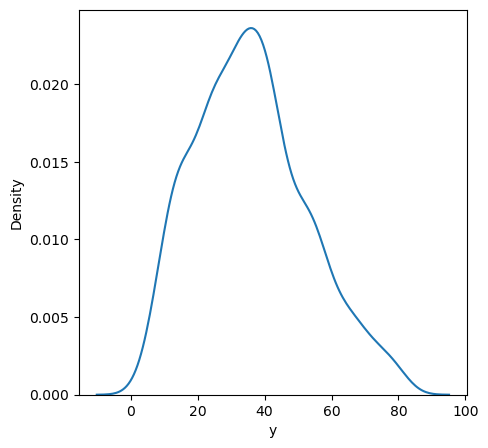

In [57]:
plt.figure(figsize = (5,5))
sns.kdeplot(y)
plt.show()

## Test for Homoscedasticity 

### Residue Vs Y_Predicted 

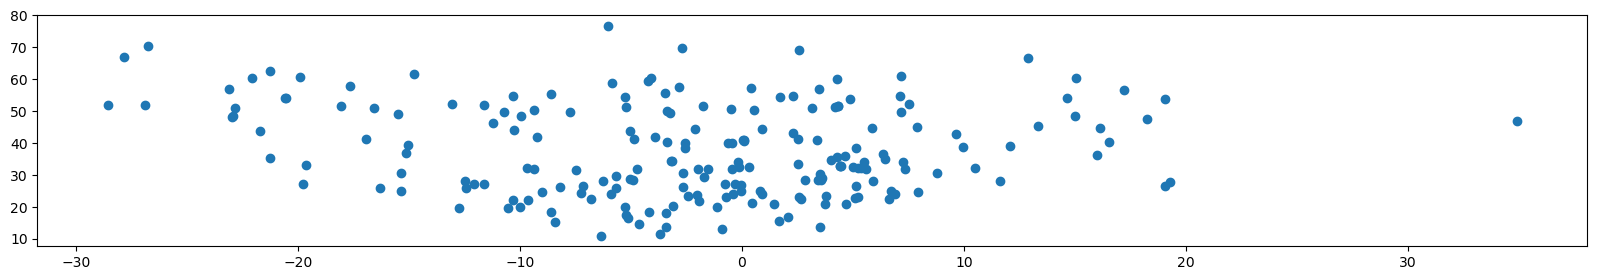

In [58]:
plt.figure(figsize= (20,3))
plt.scatter(Residue,ypred)

 As the scatter plot shows that the error vs y_predicted is randomly distributed. It means, the homoscedasticity assumption holds good.

## Multi-Colinearity 

### Bartlet's Test 

In [59]:
x__.corr()

,intercept,x1,x2,x3,x4,x5,x8
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1,NaN,1.000000,-0.229941,-0.313493,-0.106157,0.149566,0.045669
x2,NaN,-0.229941,1.000000,-0.342874,0.050448,0.113897,-0.055974
x3,NaN,-0.313493,-0.342874,1.000000,-0.222929,0.346548,-0.189262
x4,NaN,-0.106157,0.050448,-0.222929,1.000000,-0.652379,0.330950
x5,NaN,0.149566,0.113897,0.346548,-0.652379,1.000000,-0.225656
x8,NaN,0.045669,-0.055974,-0.189262,0.330950,-0.225656,1.000000


We can observe that all the correlation coefficients are less than `0.7`. It means `no` `interdependent feature` exists.

### VIF- Computation 

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [61]:
for i in range(len((x__.columns))):
    vif_ = (vif(x__,i))
    print(x__.columns[i],vif_)

intercept 1.0253202997781772
x1 1.614889544307389
x2 1.7133386375937436
x3 2.085377141022703
x4 1.9667358107838626
x5 2.4960123254249886
x8 1.166609575318366


We can observe that all the VIF values are less that `4`. It means `no` multi-colinearity.

## Auto - Correlation

### Durbin - Watson Test of Residue

In [62]:
from statsmodels.stats.stattools import durbin_watson as d_w
dw = d_w(Residue)
dw

1.7842589376670557

As the value is tends to `2`, it means the data are not auto correlated.

### ACR - Plot 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

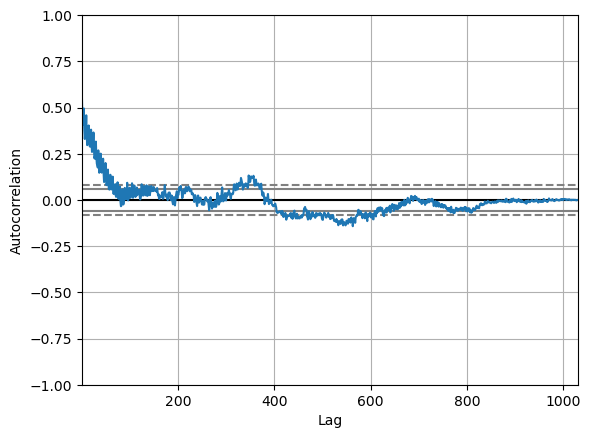

In [63]:
pd.plotting.autocorrelation_plot(y)

We can observe that in Lag plot, `auto-correlation` value is `less` than `0.5` for different values of `lag` from `1` to `1030`. It means `no auto-correaltion` exists.